<a href="https://colab.research.google.com/github/jonialon/intro-ml-python/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

- Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack.
- Conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive **MATLAB-style** plotting via gnuplot from the IPython command line.
  - Version 0.1 released in 2003.
- Supports many operating systems, graphics backends, and output formats.
- Newer packages and more modern APIs exist
  - R’s **ggplot**
  - **Seboarn** and others which are built on top of matplotlib
  - Web visualization toolkits based on **D3js** and **HTML5** canvas


## How to display plots?

- There are three applicable contexts - using Matplotlib
  1. In a script
  2. In an IPython terminal
  3. In an IPython notebook
    - ```%matplotlib notebook``` will lead to interactive plots embedded within the notebook
    - ```%matplotlib inline``` will lead to static images of your plot embedded in the notebook
      - After running this command (only once per session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic

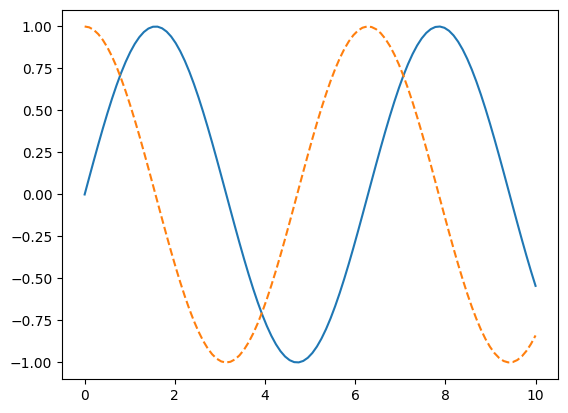

In [2]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Two Interfaces

- Functional - a convenient MATLAB-style state-based interface
  - This interface is stateful: it keeps track of the "current" figure and axes, which are where all plt commands are applied.
  - You can get a reference to these using the ```plt.gcf()``` (get current figure) and ```plt.gca()``` (get current axes) routines.
  - Convenient for simple plots. Problematic, for example, once a second panel is created, how can we go back and add something to the first?
- Object Oriented - more powerful
  - This interface is available for more complicated situations, and for when more control over the figure is required.
  - Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects.


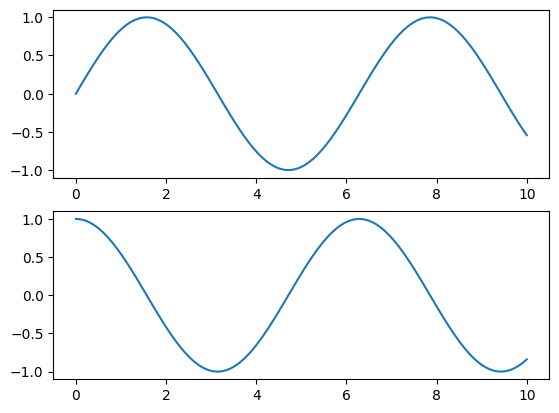

In [3]:
plt.figure() # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

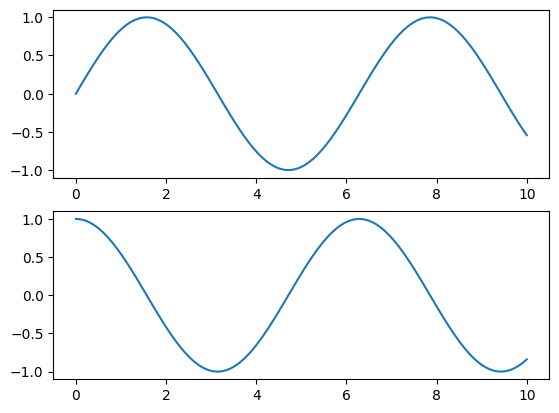

In [4]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

# Line Plots

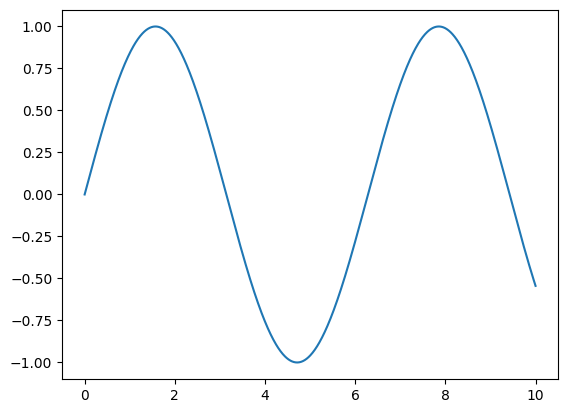

In [5]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

# plt.plot(x, np.sin(x)); # Alternatively

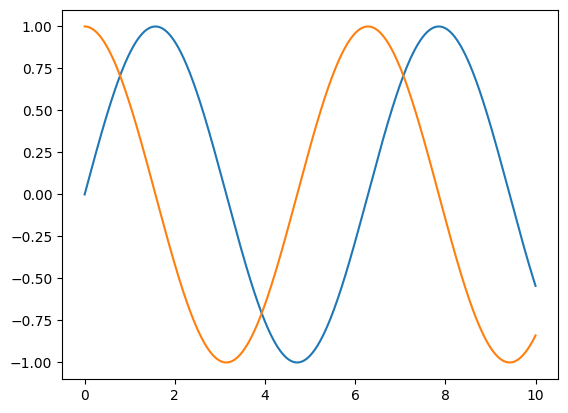

In [6]:
# Create a single figure with multiple lines,
# by calling the plot function multiple times

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

# Customizing Plots

## Defining elements of a plot

- Plot elements add context to a plot, so the plot effectively conveys meaning to its viewers
  - You set line **colors**, **styles**, and **widths** to make differentiate between different line objects
  - You set **axes limits** to make sure that your chart is well fit to your data graphic.
  - You set **axes tick marks** and plot **grids** to make it easier and faster for the viewers to interpret your chart at a glance.
  - You create a **legend** to label each line object
  - You can use **subplots** to visually compare changes in data values under different conditions, like different seasons, different locations, or in different years.


## Line Colors

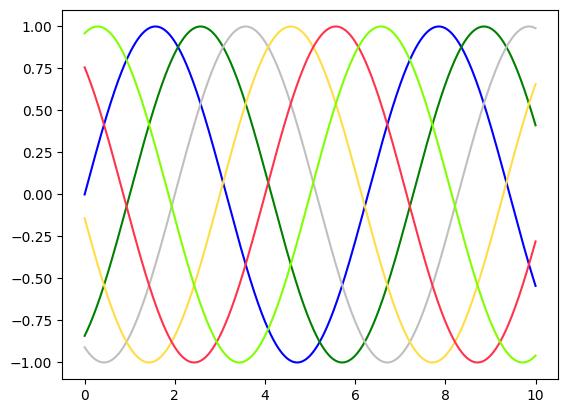

In [7]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

## Line Styles

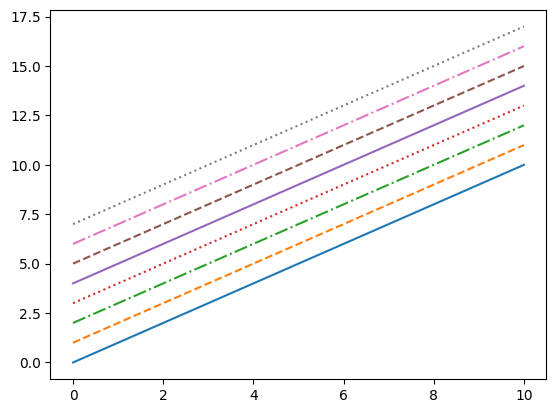

In [8]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

## Axes Limits

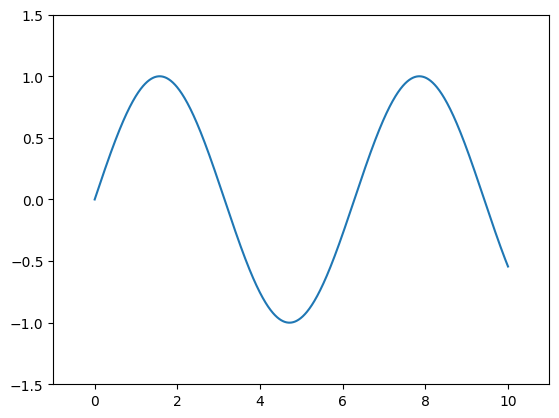

In [9]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

# plt.axis([-1, 11, -1.5, 1.5]); # Alternatively

## Labeling Plots

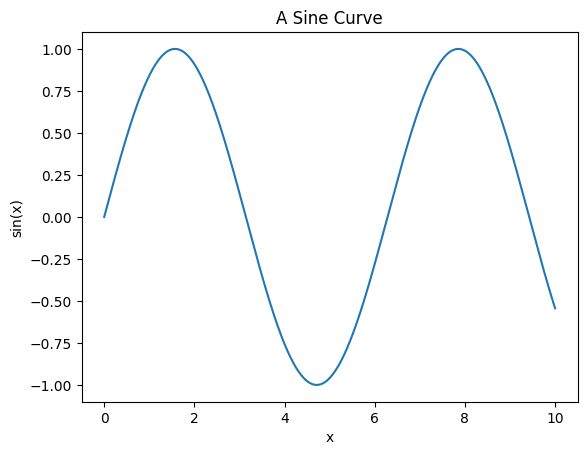

In [10]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

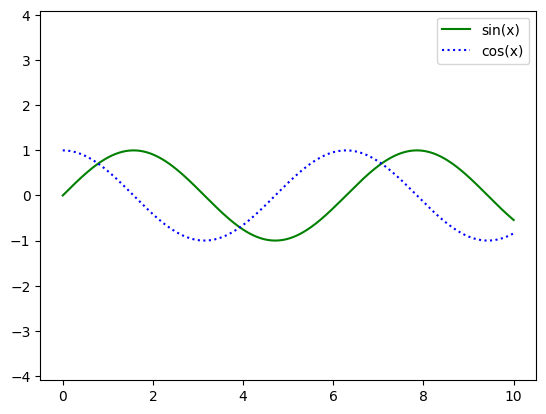

In [11]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Matplotlib Gotchas

While most `plt` functions translate directly to `ax` methods (`plt.plot` → `ax.plot`, `plt.legend` → `ax.legend`, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- `plt.xlabel`  → `ax.set_xlabel`
- `plt.ylabel` → `ax.set_ylabel`
- `plt.xlim`  → `ax.set_xlim`
- `plt.ylim` → `ax.set_ylim`
- `plt.title` → `ax.set_title`

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the `ax.set` method to set all these properties at once (see the following figure):

## Set all properties at once

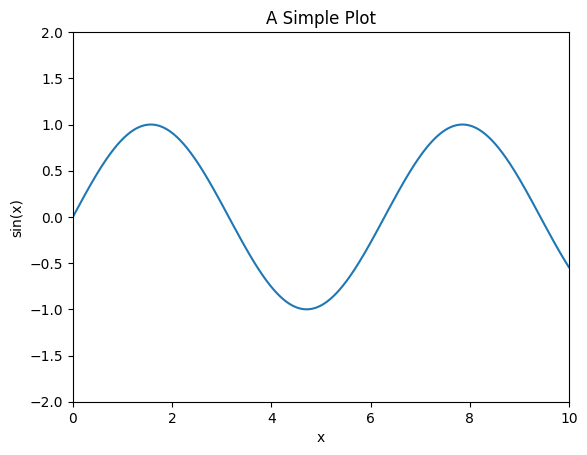

In [12]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Simple Scatter Plots

- Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.
- The points are represented individually with a dot, circle, or other shape


In [13]:
plt.style.use('seaborn-whitegrid')

<ipython-input-13-adcf1482bdd0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Scatter Plots with plt.plot

In the previous section we looked at using `plt.plot`/`ax.plot` to produce line plots.
It turns out that this same function can produce scatter plots as well (see the following figure):

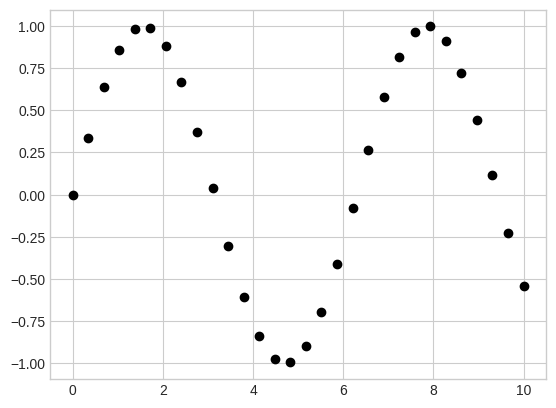

In [14]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as `'-'` or `'--'` to control the line style, the marker style has its own set of short string codes.

## Scatter Plots with plt.scatter

A second, more powerful method of creating scatter plots is the `plt.scatter` function, which can be used very similarly to the `plt.plot` function (see the following figure):

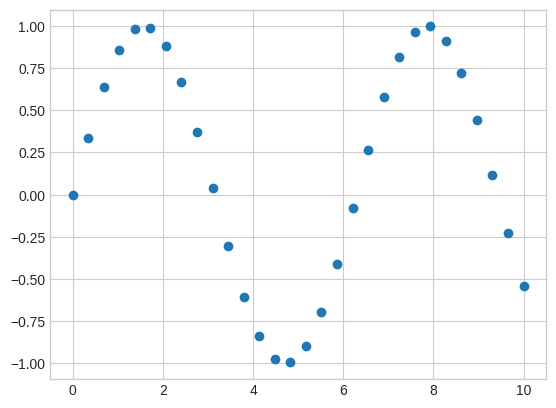

In [15]:
plt.scatter(x, y, marker='o');

The primary difference of `plt.scatter` from `plt.plot` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

For example, we might use the Iris dataset from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured (see the following figure):

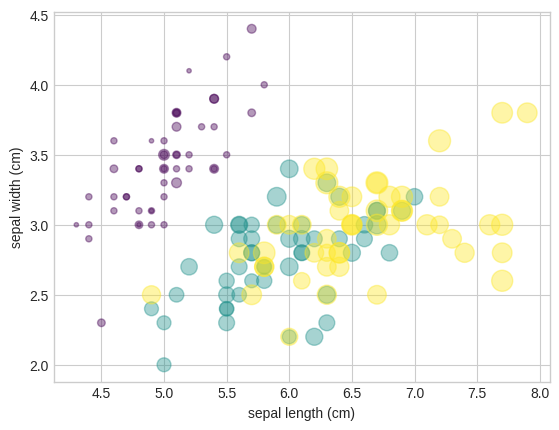

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (*x*, *y*) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

## Plot or Scatter?

- `plt.scatter` is more powerful and has the capability to render a different size and/or color for each point
- `plt.plot` is more efficient for datasets with larger than a few thousand points, as the appearance of the points is the same for the entire dataset




# Bar Plots

- Bar plots represent data attribute values within a particular data category by using bars of different heights
- Bar charts represent observation counts within categories


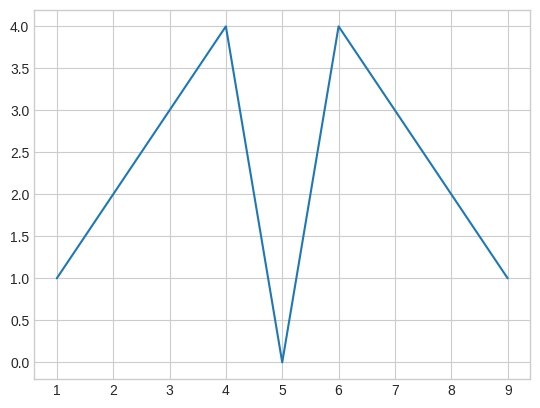

In [17]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]
plt.plot(x,y);

<BarContainer object of 9 artists>

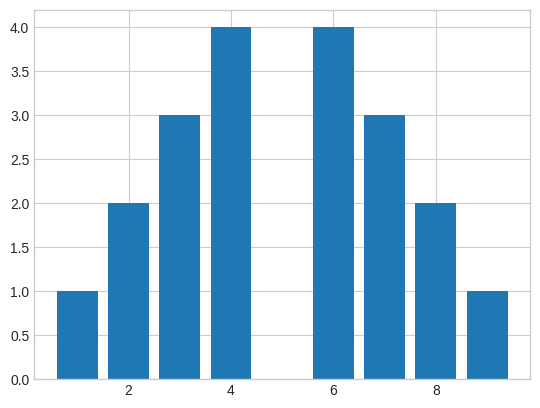

In [18]:
plt.bar(x, y)

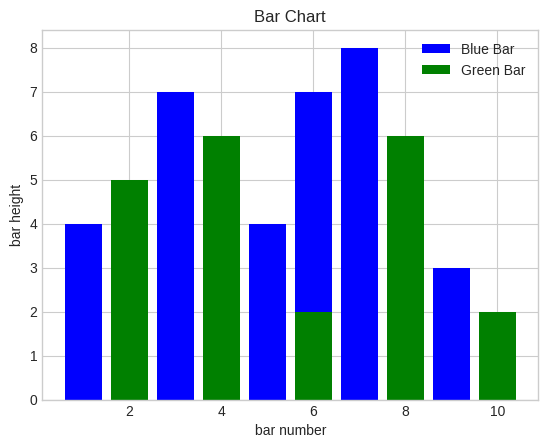

In [19]:
x = range(1,10) # Index 4 and 6 demonstrate overlapping cases
x1 = [1, 3, 4, 5, 6, 7, 9]; y1 = [4, 7, 2, 4, 7, 8, 3]
x2 = [2, 4, 6, 8, 10]; y2 = [5, 6, 2, 6, 2]
plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart")
plt.legend()

# Pie Charts

- Pie charts Represent data attribute values using a circle and slices that comprise it
- A whole and entire set of categorical data is represented by the complete circle, and the proportions of observations that fall into the different categories are represented by proportionate pie slices


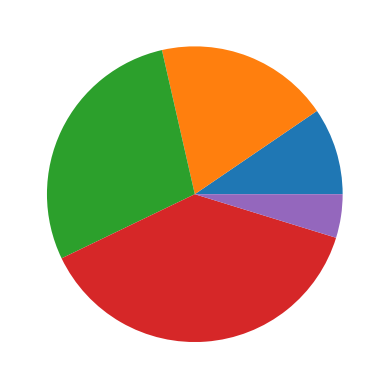

In [20]:
x = [1,2,3,4,0.5]
plt.pie(x);

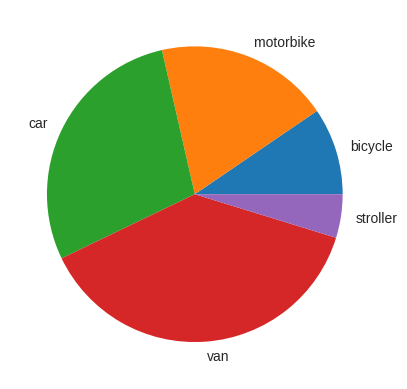

In [21]:
vehicle_type = ['bicycle', 'motorbike', 'car', 'van', 'stroller']
plt.pie(x, labels=vehicle_type);

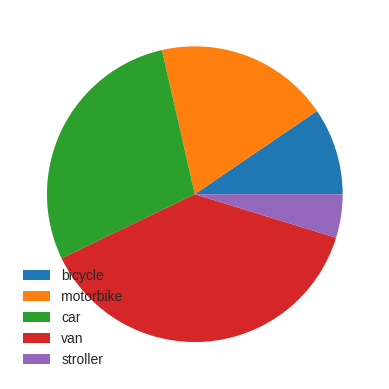

In [22]:
vehicle_type = ['bicycle', 'motorbike', 'car', 'van', 'stroller']
plt.pie(x);
plt.legend(vehicle_type, loc='best');

# Histograms

A histogram is an approximate representation of the distribution of numerical or categorical data. Each bar groups numbers into ranges. Taller bars show that more data falls in that range.

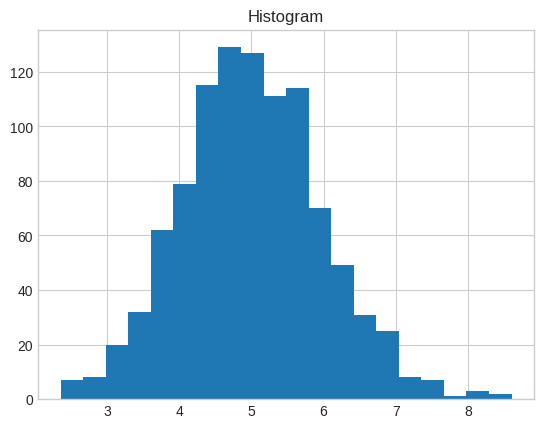

In [23]:
# Generate random data in a bell curve around 5.
n = 5 + np.random.randn(1000)
plt.hist(n, bins=20);
plt.title("Histogram");

The `plt.hist` has more customization options available. The combination of `histtype='stepfilled'` along with some transparency `alpha` can be very useful when comparing histograms of several distributions:

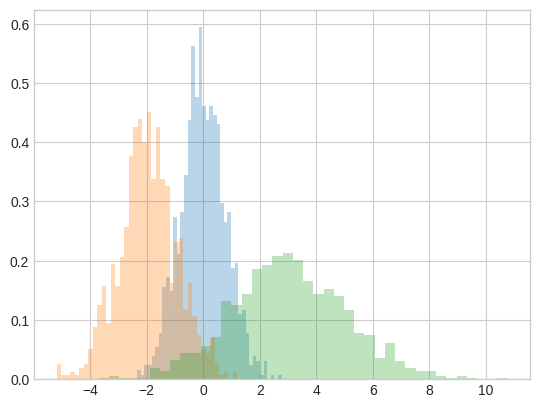

In [24]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Two-Dimensional Histograms and Binnings

- We can create histograms in two-dimensions by dividing points among two-dimensional bins.
- For example, let's define some data—an x and y array drawn from a multivariate Gaussian distribution
- Then, plot a two-dimensional histogram by using Matplotlib's `plt.hist2d` function


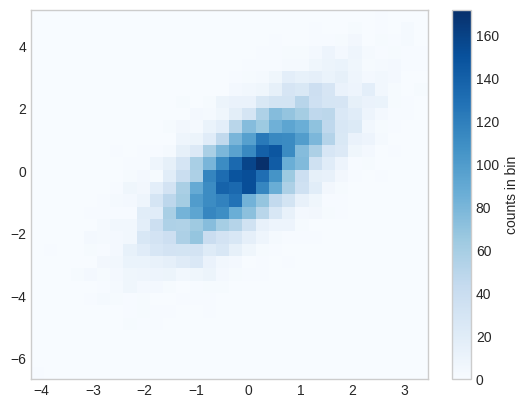

In [25]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')